In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

1. Import the data set into pandas data frame and inspect it. This data set provides information
on the following variables.

In [20]:
read_data = pd.read_csv('cali_housing.csv')
data_set = pd.DataFrame(read_data)
print(data_set.shape)
print(data_set.head())

(20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252        41  6.984127   1.023810         322  2.555556     37.88   
1  8.3014        21  6.238137   0.971880        2401  2.109842     37.86   
2  7.2574        52  8.288136   1.073446         496  2.802260     37.85   
3  5.6431        52  5.817352   1.073059         558  2.547945     37.85   
4  3.8462        52  6.281853   1.081081         565  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


2. Select one or more explanatory variables you would like to use.

In [21]:
correct_label = data_set['MedHouseVal'].values
feature_vectors = data_set.drop(['MedHouseVal'], axis = 1)

3. Figure out if there are any missing values in the explanatory variables you want to use and
if there are any categorical variables that need to be encoded.

In [22]:
# No missing values and all entries are numerical
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  int64  
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  int64  
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB
None


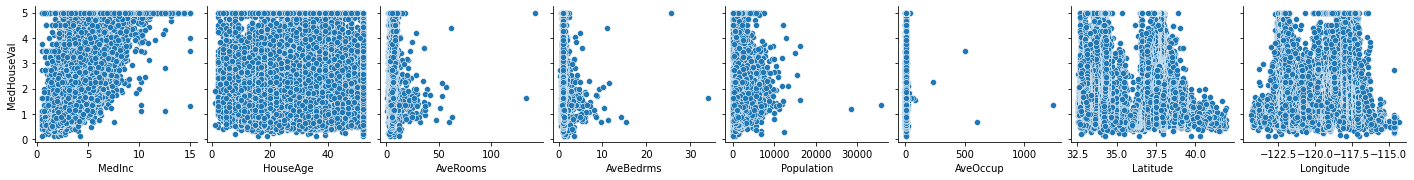

In [23]:
sns.pairplot(data_set, 
             x_vars = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'],
             y_vars = ['MedHouseVal']);

In [24]:
print(feature_vectors.shape)
print(feature_vectors.describe())

(20640, 8)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.

4. Split the data into training and testing sets.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(feature_vectors, correct_label, test_size=0.3, random_state=42)

5. Build a regression tree using the training data.

In [26]:
regressor = tree.DecisionTreeRegressor()
model = regressor.fit(X_train, y_train)

In [27]:
y_pred = model.predict(X_test)

In [28]:
model.get_depth()

34

In [29]:
model.get_n_leaves()

13842

Relative importance of the features:  [0.52304145 0.05344454 0.04900786 0.02683226 0.03115904 0.13900033
 0.08993683 0.08757769]


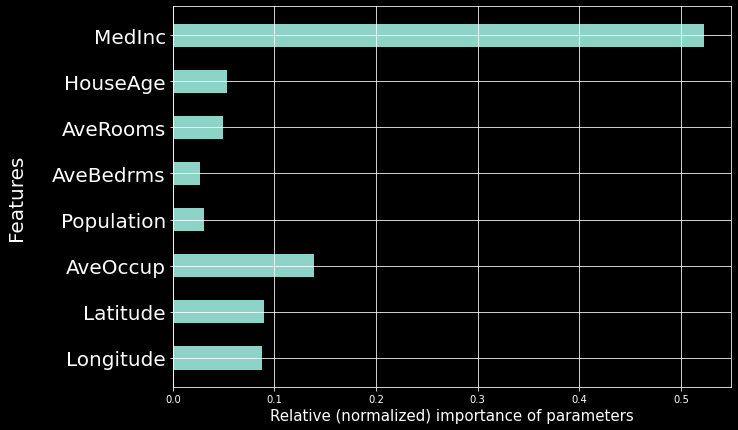

In [30]:
n_features = 8
importance = model.feature_importances_
print("Relative importance of the features: ",model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),feature_vectors[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=model.feature_importances_,height=0.5)

6. Inspect the evaluation measures such as MAE, MSE, RMSE, and R-squared.

In [31]:
from sklearn import metrics
print(f"Mean Absolute Error = {np.round_((metrics.mean_absolute_error(y_test, y_pred)),3)}")
print(f"Mean Squared Error = {np.round_((metrics.mean_squared_error(y_test, y_pred, squared = False)),3)}")
print(f"Root Mean Squared Error = {np.round_((metrics.mean_squared_error(y_test, y_pred)),3)}")
print(f"r2 = {metrics.r2_score(y_test, y_pred)}")

Mean Absolute Error = 0.468
Mean Squared Error = 0.723
Root Mean Squared Error = 0.522
r2 = 0.6019792180870491


In [32]:
adj_feature_vectors = data_set.drop(['MedHouseVal', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population'], axis = 1)
adj_feature_vectors.shape

(20640, 4)

In [33]:
regressor = tree.DecisionTreeRegressor()
model = regressor.fit(X_train, y_train)

In [34]:
y_pred = model.predict(X_test)
print(f"Mean Absolute Error = {np.round_((metrics.mean_absolute_error(y_test, y_pred)),3)}")
print(f"Mean Squared Error = {np.round_((metrics.mean_squared_error(y_test, y_pred, squared = False)),3)}")
print(f"Root Mean Squared Error = {np.round_((metrics.mean_squared_error(y_test, y_pred)),3)}")
print(f"r2 = {metrics.r2_score(y_test, y_pred)}")

Mean Absolute Error = 0.469
Mean Squared Error = 0.726
Root Mean Squared Error = 0.528
r2 = 0.5980632513735102


In [112]:
X_train, X_test, y_train, y_test = train_test_split(adj_feature_vectors, correct_label, test_size=0.3, random_state=42)

7. Modify the tree parameters (such as criterion, max depth, min samples split, and min samples leaf)
of your model to increase the quality of the prediction. You might want to plot graphs showing
mean absolute error, mean square error, or r-squared for different values of these parameters
and pick the best parameters. You can also use the GridSearchCV() method.

In [113]:
from sklearn.model_selection import GridSearchCV
param_dict = {    
    "criterion": ['squared_error', 'absolute_error'],
    "max_depth": range(1, 20, 2),                      
    "min_samples_split": range(2, 20, 2),
    "min_samples_leaf": range(1, 16, 2)
}

In [114]:
clf = GridSearchCV(model,
            param_grid = param_dict,
            cv = 5,
            verbose = 0,
            scoring = 'neg_mean_squared_error',
            n_jobs = -1)

8. Build a regression tree with the best choice of parameters you found in the previous step and
plot your tree.

In [115]:
clf_grid = clf.fit(X_train, y_train)

In [116]:
clf_grid.best_estimator_

DecisionTreeRegressor(max_depth=13, min_samples_leaf=9, min_samples_split=18)

In [117]:
ypred_clf_grid = clf_grid.predict(X_test)

9. Compute the MAE, MSE, RMSE, R2, and adjusted R2
for your model.

In [169]:
print(f"Mean Absolute Error = {np.round_((metrics.mean_absolute_error(y_test, ypred_clf_grid)),3)}")
print(f"Mean Squared Error = {np.round_((metrics.mean_squared_error(y_test, ypred_clf_grid, squared = False)),3)}")
print(f"Root Mean Squared Error = {np.round_((metrics.mean_squared_error(y_test, ypred_clf_grid)),3)}")
print(f"R2 = {metrics.r2_score(y_test, ypred_clf_grid)}")
print(f"adjusted R2 = {1-(1-metrics.r2_score(y_test, ypred_clf_grid)*(len(y_test)/(len(y_test)-4+1)))}")

Mean Absolute Error = 0.375
Mean Squared Error = 0.572
Root Mean Squared Error = 0.327
R2 = 0.7511107354315367
adjusted R2 = 0.7514748220701366


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.486078 to fit


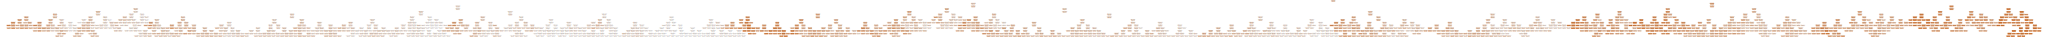

In [119]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf_grid.best_estimator_, out_file=None, 
                                feature_names=['MedInc','AveOccup','Latitude','Longitude' ],  
                                filled=True)

graph.format = "png"
graph.render("Tuck_DTRegressor_Chart")

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

10. Determine which features are the most important in your model.

Relative importance of the features:  [0.58221914 0.14577821 0.14106193 0.13094072]


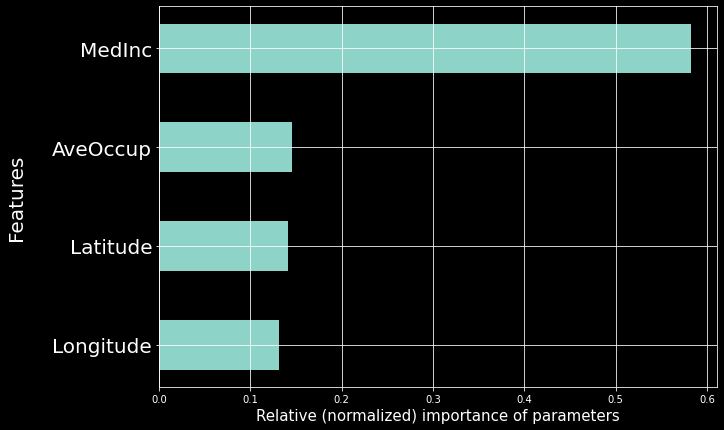

In [120]:
n_features = 4
importance = clf_grid.best_estimator_.feature_importances_
print("Relative importance of the features: ",clf_grid.best_estimator_.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),adj_feature_vectors[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=clf_grid.best_estimator_.feature_importances_,height=0.5)

11. Take some values for the explanatory variables and use your model to predict the median
house value.

In [155]:
for i in range(30, 50):    
    print(f"predicted label = {(ypred_clf_grid[i])}")
    print(f"actual label = {y_test[i]}")

predicted label = 0.9340416666666668
actual label = 0.851
predicted label = 1.5654117647058823
actual label = 1.384
predicted label = 2.762384615384616
actual label = 1.375
predicted label = 3.764891111111111
actual label = 4.65
predicted label = 2.6893333333333334
actual label = 2.718
predicted label = 2.2749166666666674
actual label = 2.394
predicted label = 4.2095866666666675
actual label = 3.409
predicted label = 1.6232527472527476
actual label = 1.504
predicted label = 1.7026315789473685
actual label = 1.281
predicted label = 1.608
actual label = 1.56
predicted label = 3.1338888888888885
actual label = 2.581
predicted label = 0.9390512820512822
actual label = 0.905
predicted label = 0.8225384615384613
actual label = 0.713
predicted label = 2.245111111111111
actual label = 2.197
predicted label = 1.3726666666666667
actual label = 1.51
predicted label = 2.0075081967213118
actual label = 2.901
predicted label = 1.2833999999999999
actual label = 1.42
predicted label = 1.443
actual lab